# Stock Data Analysis 

In this data project we will focus on exploratory data analysis of stock prices. We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [3]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [4]:
BAC = data.DataReader('BAC', 'google', start, end)
BAC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


In [5]:
C = data.DataReader('C', 'google', start, end)
GS = data.DataReader('GS', 'google', start, end)
JPM = data.DataReader('JPM', 'google', start, end)
MS = data.DataReader('MS', 'google', start, end)
WFC = data.DataReader('WFC', 'google', start, end)

In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [10]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [11]:
# What is the max Close price for each bank's stock throughout the time period
bank_stocks.xs('Close', level=1, axis=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [12]:
bank_stocks.BAC.Close.pct_change().head()

Date
2006-01-03         NaN
2006-01-04   -0.010620
2006-01-05    0.001288
2006-01-06   -0.001501
2006-01-09    0.000644
Name: Close, dtype: float64

In [13]:
returns = pd.DataFrame()
for s in tickers:
    cname = s + ' Return'
    returns[cname] = bank_stocks[s].Close.pct_change()

In [14]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [15]:
print(bank_stocks.shape)
print(returns.shape)

(2517, 30)
(2517, 6)


** Create a pairplot using seaborn of the returns dataframe. It seems stock "C" (CitiGroup) stands out.**

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

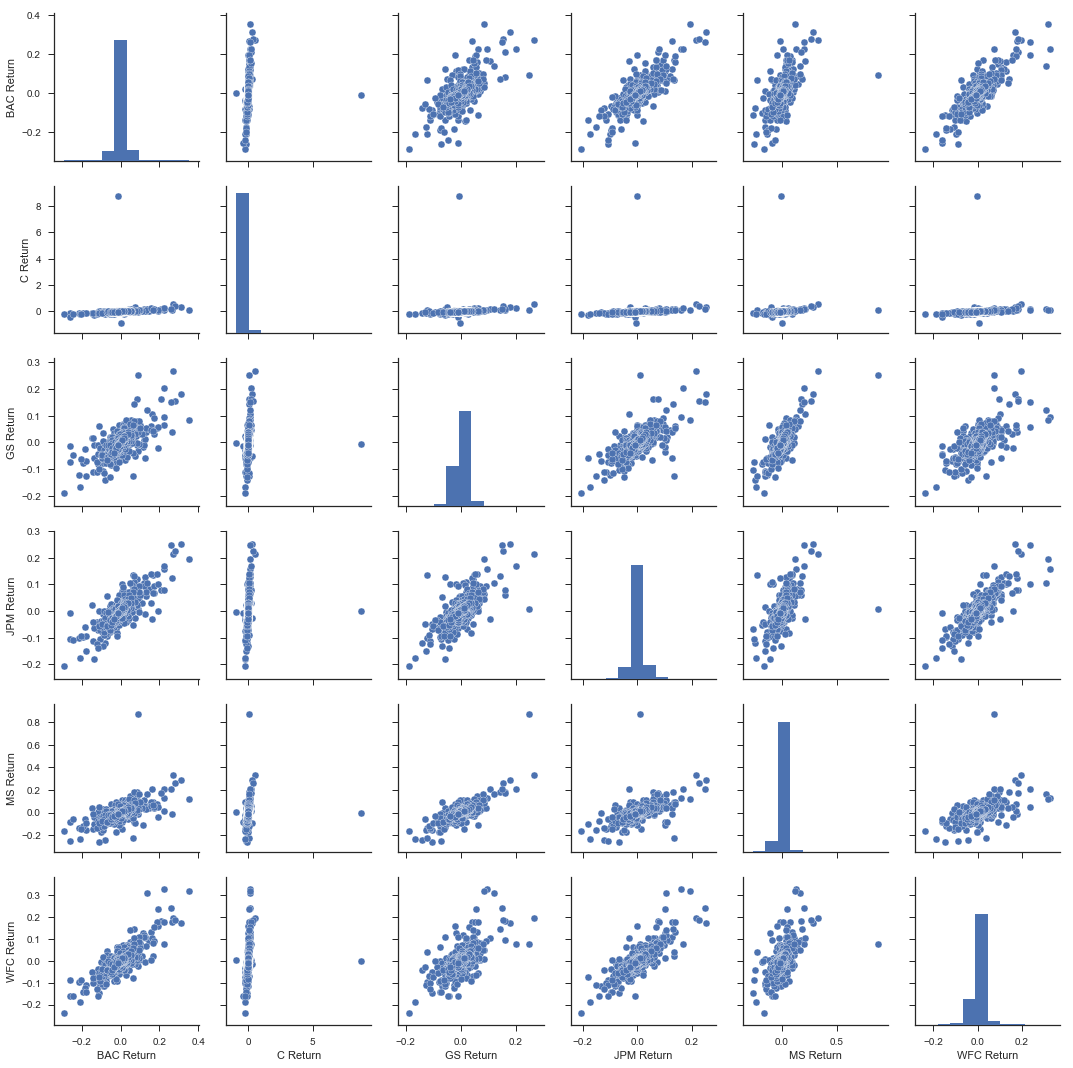

In [17]:
sns.set_style(style='ticks')
sns.pairplot(returns.dropna())

Why? Here is the CitiGroup's background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. We should notice that 4 of the banks share the same day for the worst drop, which is President Obama's Inauguration day.**

In [18]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

In [19]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

See [Citigroup had a stock split.](http://www.citigroup.com/citi/news/2011/110321a.htm)
"Citi anticipates the reverse stock split will be effective after the close of trading on May 6, 2011, and that Citi common stock will begin trading on a split adjusted basis on the New York Stock Exchange (NYSE) at the opening of trading on May 9, 2011."

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [20]:
# CitiGroup is the riskiest
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [21]:
# Very similar risk profiles, but Morgan Stanley and Bank of America are slightly riskier
returns[returns.index.year==2015].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

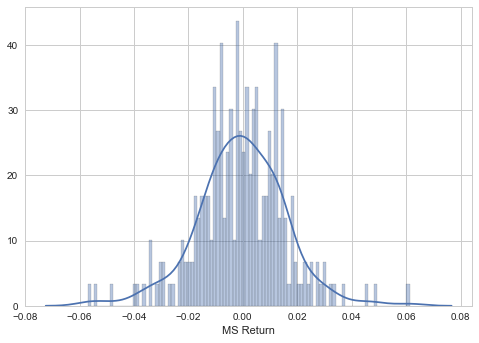

In [22]:
sns.set_style('whitegrid')
plt.rcParams["patch.force_edgecolor"] = True
sns.distplot(returns[returns.index.year==2015]['MS Return'], bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

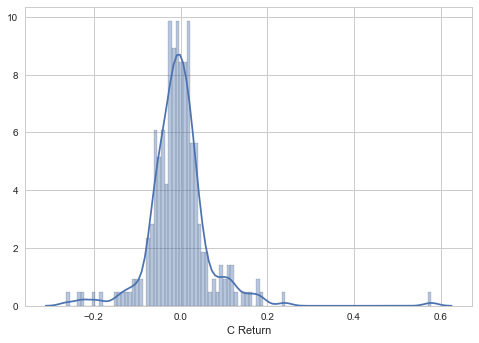

In [23]:
sns.distplot(returns[returns.index.year==2008]['C Return'], bins=100)

** Create a line plot showing Close price for each bank for the entire index of time.**

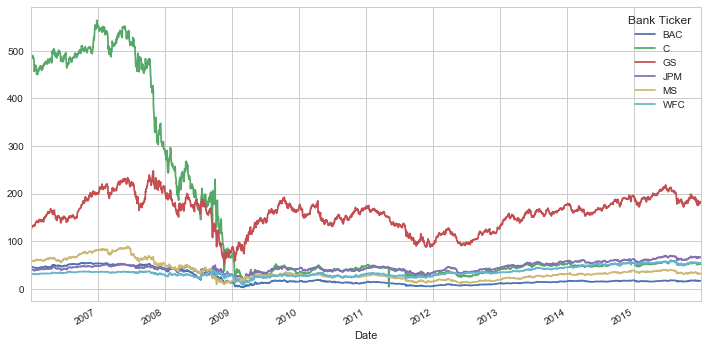

In [24]:
bank_stocks.xs('Close', level=1, axis=1).plot(figsize=(12, 6))

In [26]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

** Plot the close price for each stock during 2006 - 2016, using interactive Plotly **

In [27]:
temp = bank_stocks.xs('Close', level=1, axis=1)
temp.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


In [28]:
iplot([{'x':temp.index, 'y':temp.BAC, 'name':'BAC'}, 
       {'x':temp.index, 'y':temp.C, 'name':'C'}, 
       {'x':temp.index, 'y':temp.GS, 'name':'GS'}, 
       {'x':temp.index, 'y':temp.JPM, 'name':'JPM'}, 
       {'x':temp.index, 'y':temp.MS, 'name':'MS'}, 
       {'x':temp.index, 'y':temp.WFC, 'name':'WFC'}])

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

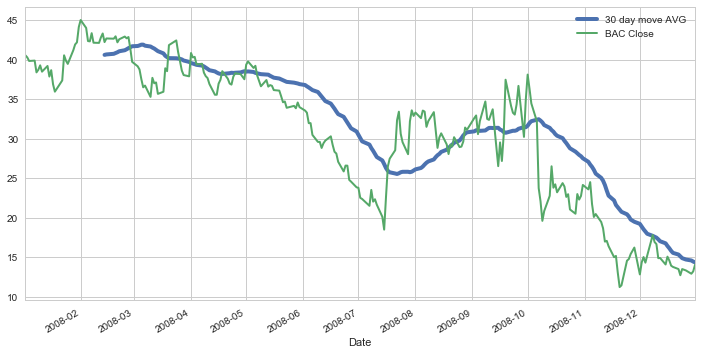

In [29]:
plt.figure(figsize=(12, 6))
BAC[BAC.index.year==2008].Close.rolling(window=30).mean().shift().plot(label='30 day move AVG', lw=4)
BAC[BAC.index.year==2008].Close.plot(label='BAC Close', lw=2)
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

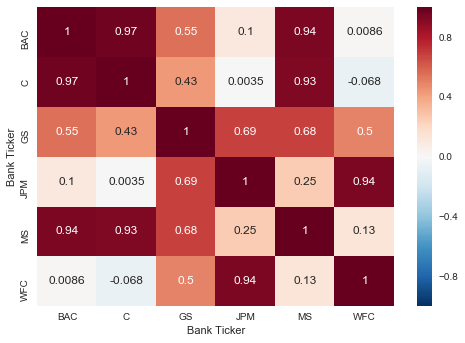

In [30]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level=1).corr(), annot=True)

** Use seaborn's clustermap to cluster the correlations together:**

C:\Anaconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



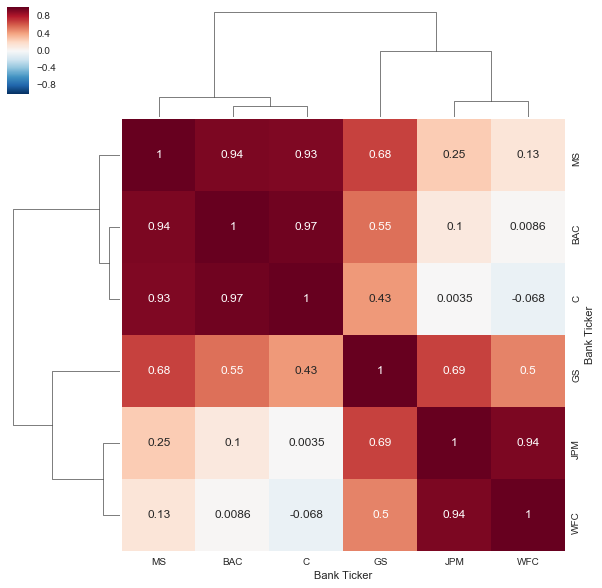

In [31]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level=1).corr(), annot=True)